In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

C:\Users\maslo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [2]:
data = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/20_lesson/materials/vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [6]:
data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.812900,0.997800,26.425400,0.443800,30609.649700,112.414400,155.560300,0.124700
std,15.514785,0.046855,13.153552,0.496856,16562.392967,53.975042,83.923849,0.330395
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24458.250000,30.000000,83.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31746.000000,136.000000,156.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39572.250000,152.000000,228.000000,0.000000
max,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


In [10]:
data['Response'].value_counts()

0    8753
1    1247
Name: Response, dtype: int64

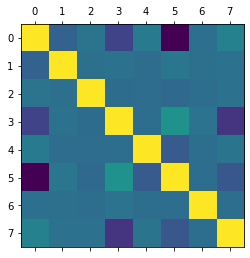

In [14]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

In [16]:
data.corr().style.background_gradient(cmap='coolwarm')

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.081323,0.030638,-0.261456,0.081564,-0.576066,0.000030,0.113888
Driving_License,-0.081323,1.000000,0.004926,0.020464,-0.014338,0.044335,0.002704,0.011263
Region_Code,0.030638,0.004926,1.000000,-0.021270,-0.012213,-0.039733,-0.008527,0.010230
Previously_Insured,-0.261456,0.020464,-0.021270,1.000000,-0.005164,0.224719,0.022350,-0.333502
Annual_Premium,0.081564,-0.014338,-0.012213,-0.005164,1.000000,-0.123851,-0.008878,0.029839
Policy_Sales_Channel,-0.576066,0.044335,-0.039733,0.224719,-0.123851,1.000000,-0.006131,-0.146421
Vintage,0.000030,0.002704,-0.008527,0.022350,-0.008878,-0.006131,1.000000,-0.007187
Response,0.113888,0.011263,0.010230,-0.333502,0.029839,-0.146421,-0.007187,1.000000


In [32]:
pd.DataFrame(data[['Vehicle_Age', 'Response']].value_counts()).sort_values(by='Vehicle_Age')

0
Vehicle_Age Response      
1-2 Year    0         4308
            1          955
< 1 Year    0         4157
            1          173
> 2 Years   0          288
            1          119

In [33]:
data.select_dtypes(include='object').columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [3]:
from sklearn.preprocessing import OneHotEncoder

for cat_col in list(data.select_dtypes(include='object').columns):
    encoder = OneHotEncoder(drop='first')
    encoder.fit(data[[cat_col]])
    encoder_columns = list(encoder.get_feature_names_out([cat_col]))
    encoded_data = encoder.transform(data[[cat_col]]).toarray()
    encoded_data = pd.DataFrame(encoded_data,
                                columns=encoder_columns,
                                index=data.index)
    data = pd.concat([data, encoded_data], axis=1)

In [4]:
data = data.drop(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], axis=1)

In [40]:
data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1.0,0.0,1.0,1.0
1,76,1,3.0,0,33536.0,26.0,183,0,1.0,0.0,0.0,0.0
2,47,1,28.0,0,38294.0,26.0,27,1,1.0,0.0,1.0,1.0
3,21,1,11.0,1,28619.0,152.0,203,0,1.0,1.0,0.0,0.0
4,29,1,41.0,1,27496.0,152.0,39,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24,1,37.0,1,21243.0,152.0,21,0,0.0,1.0,0.0,0.0
9996,28,1,35.0,1,23589.0,160.0,173,0,1.0,1.0,0.0,0.0
9997,27,1,15.0,0,33340.0,152.0,207,0,0.0,1.0,0.0,1.0
9998,28,1,14.0,1,25426.0,152.0,247,0,0.0,1.0,0.0,0.0


**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    learning_rate = 1, 
    random_state = 1, 
    n_estimators = 100
)

model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, random_state=1)

AUC ROC = 0.8282399901744043
AUC ROC = 0.8282399901744043


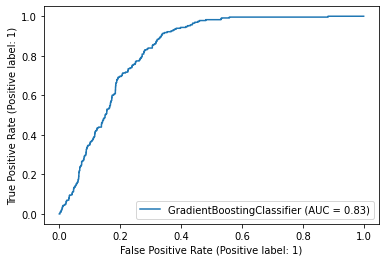

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

tpr, fpr, thresholds  = roc_curve(y_test, model.predict_proba(X_test)[:,1])
print('AUC ROC =', auc(tpr, fpr))
print('AUC ROC =', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [49]:
print(classification_report(y_test, model.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.904     0.931     0.917      1770
           1      0.311     0.239     0.270       230

    accuracy                          0.852      2000
   macro avg      0.607     0.585     0.594      2000
weighted avg      0.836     0.852     0.843      2000



**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [54]:
### Задаем сетку параметров
n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

In [61]:
from sklearn.metrics import f1_score

metrics = []

for estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        model = GradientBoostingClassifier(
            learning_rate = learning_rate, 
            random_state = 1, 
            n_estimators = estimators,
            max_depth=5
        )

        model.fit(X_train, y_train)
        
        metrics.append((learning_rate, estimators, f1_score(y_test, model.predict(X_test), average='weighted')))




In [62]:
metrics = pd.DataFrame(metrics, columns=['learning_rate','estimators','f1_score'])

In [72]:
metrics.sort_values(by='f1_score', ascending=False).head(10).style.background_gradient(cmap ='viridis')

,learning_rate,estimators,f1_score
22,0.100000,1000,0.846063
21,1.000000,1000,0.845763
6,1.000000,20,0.844182
18,1.000000,700,0.843336
16,0.100000,200,0.843124
19,0.100000,700,0.842680
15,1.000000,200,0.841933
3,1.000000,10,0.838400
13,0.100000,100,0.837728
23,0.010000,1000,0.837111


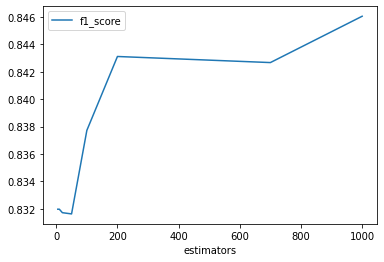

In [68]:
metrics[metrics['learning_rate'] == 0.1].plot(x='estimators', y='f1_score')

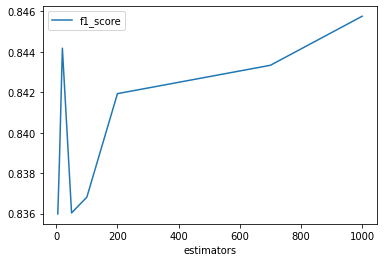

In [69]:
metrics[metrics['learning_rate'] == 1].plot(x='estimators', y='f1_score')

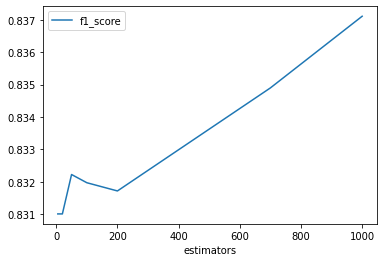

In [70]:
metrics[metrics['learning_rate'] == 0.01].plot(x='estimators', y='f1_score')

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [80]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]
metrics = []
for estimators in n_estimators_list:
    rf_model_md_5 = RandomForestClassifier(max_depth=5, n_estimators=estimators)
    rf_model_md_5000 = RandomForestClassifier(max_depth=5000, n_estimators=estimators)
    gb_model_md_5 = GradientBoostingClassifier(max_depth=5, n_estimators=estimators)
    gb_model_md_5000 = GradientBoostingClassifier(max_depth=5000, n_estimators=estimators)
    
    rf_model_md_5.fit(X_train, y_train)
    metrics.append(('rf_model_md_5', 
                    estimators, 
                    f1_score(y_test, rf_model_md_5.predict(X_test), average='weighted'),
                    f1_score(y_train, rf_model_md_5.predict(X_train), average='weighted')))
    
    rf_model_md_5000.fit(X_train, y_train)
    metrics.append(('rf_model_md_5000', 
                    estimators, 
                    f1_score(y_test, rf_model_md_5000.predict(X_test), average='weighted'),
                    f1_score(y_train, rf_model_md_5000.predict(X_train), average='weighted')))
    
    gb_model_md_5.fit(X_train, y_train)
    metrics.append(('gb_model_md_5', 
                    estimators, 
                    f1_score(y_test, gb_model_md_5.predict(X_test), average='weighted'),
                    f1_score(y_train, gb_model_md_5.predict(X_train), average='weighted')))
    
    gb_model_md_5000.fit(X_train, y_train)
    metrics.append(('gb_model_md_5000', 
                    estimators, 
                    f1_score(y_test, gb_model_md_5000.predict(X_test), average='weighted'),
                    f1_score(y_train, gb_model_md_5000.predict(X_train), average='weighted')))

In [81]:
metrics = pd.DataFrame(metrics, columns=['model_name','estimators','f1_score_test', 'f1_score_train'])

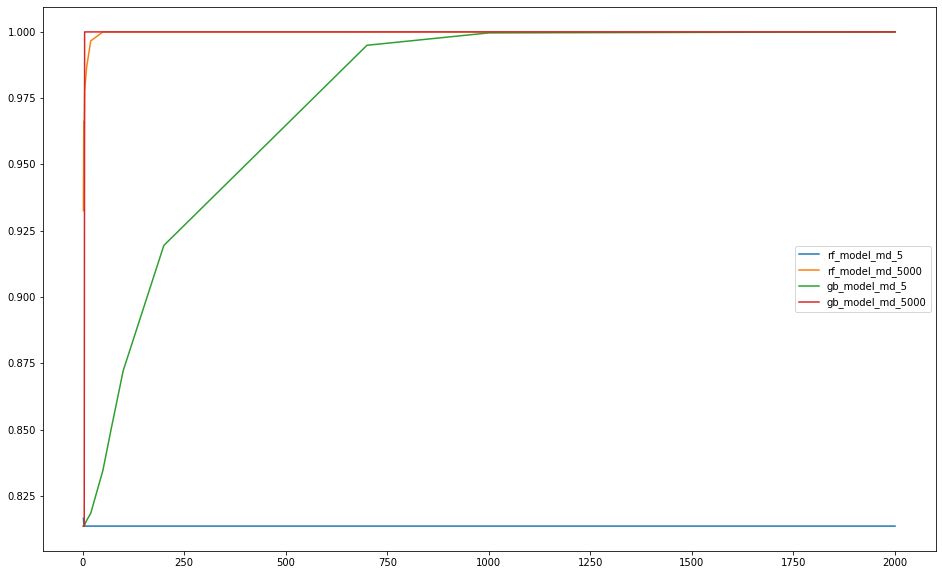

In [89]:
fig = plt.figure()
fig.set_size_inches(16, 10)

for model in ['rf_model_md_5', 'rf_model_md_5000', 'gb_model_md_5', 'gb_model_md_5000']:
    plot_data = metrics[metrics['model_name']==model]
    plt.plot(plot_data['estimators'], plot_data['f1_score_train'])

plt.legend(['rf_model_md_5', 'rf_model_md_5000', 'gb_model_md_5', 'gb_model_md_5000'])

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [92]:
data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1.0,0.0,1.0,1.0
1,76,1,3.0,0,33536.0,26.0,183,0,1.0,0.0,0.0,0.0
2,47,1,28.0,0,38294.0,26.0,27,1,1.0,0.0,1.0,1.0
3,21,1,11.0,1,28619.0,152.0,203,0,1.0,1.0,0.0,0.0
4,29,1,41.0,1,27496.0,152.0,39,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24,1,37.0,1,21243.0,152.0,21,0,0.0,1.0,0.0,0.0
9996,28,1,35.0,1,23589.0,160.0,173,0,1.0,1.0,0.0,0.0
9997,27,1,15.0,0,33340.0,152.0,207,0,0.0,1.0,0.0,1.0
9998,28,1,14.0,1,25426.0,152.0,247,0,0.0,1.0,0.0,0.0


In [93]:
data_orig = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/20_lesson/materials/vehicle_insurance.csv')

In [95]:
from catboost import CatBoostClassifier

X = data_orig.drop('Response', axis=1)
y = data_orig['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

model = CatBoostClassifier()
model.fit(X_train, y_train, cat_features=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], verbose=100)

Learning rate set to 0.025035
0:	learn: 0.6524209	total: 21.9ms	remaining: 21.8s
100:	learn: 0.2744558	total: 2.15s	remaining: 19.1s
200:	learn: 0.2623058	total: 4.53s	remaining: 18s
300:	learn: 0.2549623	total: 6.91s	remaining: 16s
400:	learn: 0.2471914	total: 9.32s	remaining: 13.9s
500:	learn: 0.2384713	total: 12s	remaining: 12s
600:	learn: 0.2309064	total: 15s	remaining: 9.95s
700:	learn: 0.2237543	total: 18s	remaining: 7.67s
800:	learn: 0.2165234	total: 22.8s	remaining: 5.67s
900:	learn: 0.2103005	total: 25.6s	remaining: 2.81s
999:	learn: 0.2042360	total: 27.9s	remaining: 0us


AUC ROC = 0.85114468189634
AUC ROC = 0.85114468189634


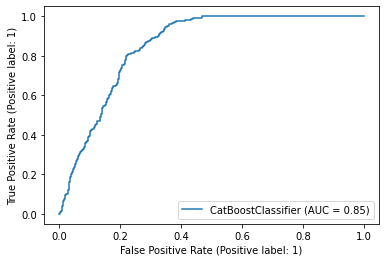

In [96]:
tpr, fpr, thresholds  = roc_curve(y_test, model.predict_proba(X_test)[:,1])
print('AUC ROC =', auc(tpr, fpr))
print('AUC ROC =', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [97]:
print(classification_report(y_test, model.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.889     0.987     0.935      1770
           1      0.343     0.052     0.091       230

    accuracy                          0.879      2000
   macro avg      0.616     0.520     0.513      2000
weighted avg      0.826     0.879     0.838      2000



In [100]:
X_test.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [99]:
model.get_feature_importance()

array([ 3.1033428 , 11.36658464,  0.03227638,  7.43228013, 27.35891126,
        4.74671151, 21.36760853,  9.26128996,  6.2198574 ,  9.11113739])

<BarContainer object of 10 artists>

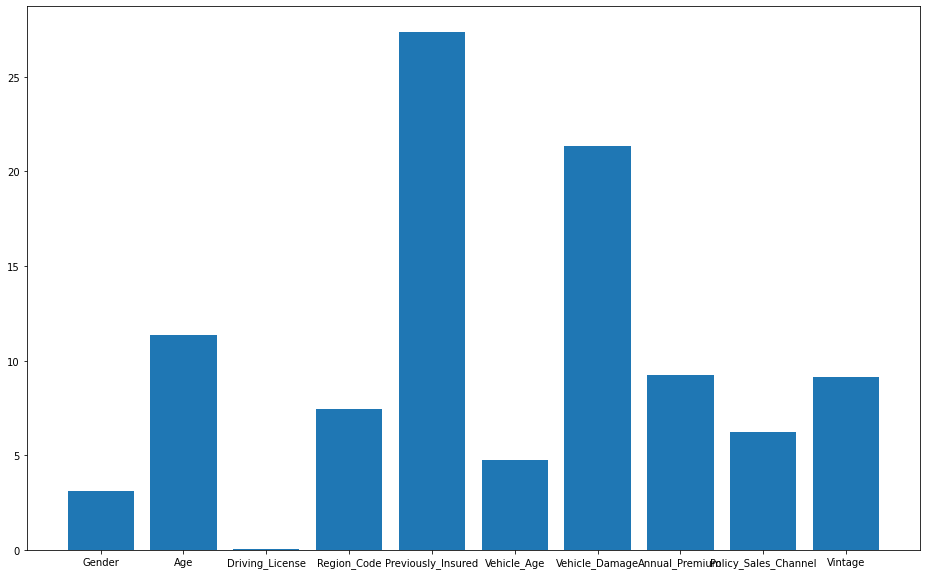

In [102]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.bar(x=list(X_test.columns),height=model.get_feature_importance())

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

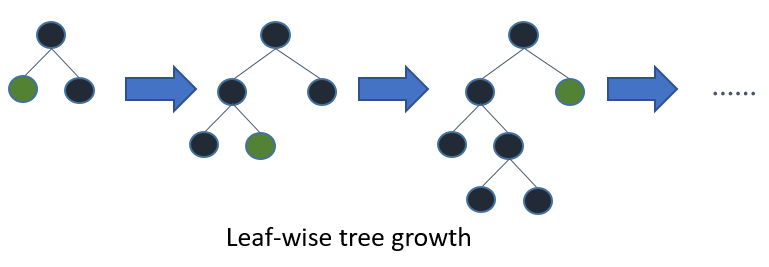

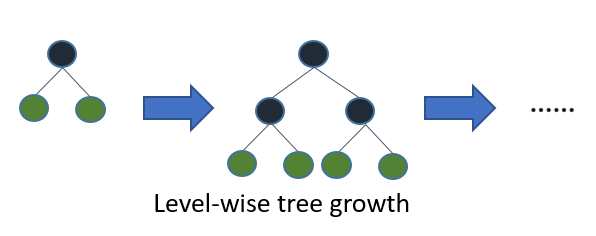

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [5]:
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

NameError: name 'train_test_split' is not defined

In [7]:
!pip install lightgbm==3.3.2

In [8]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}
model = LGBMClassifier()
search = GridSearchCV(model, params)
search.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 100],
                         'n_estimators': [100, 500, 1000, 2000]})

In [9]:
search.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}

In [12]:
model = LGBMClassifier(learning_rate=0.01, max_depth=2, n_estimators=100)

In [13]:
model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=2)

In [14]:
print(classification_report(y_test, model.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.885     1.000     0.939      1770
           1      0.000     0.000     0.000       230

    accuracy                          0.885      2000
   macro avg      0.443     0.500     0.469      2000
weighted avg      0.783     0.885     0.831      2000

